### Combine proportion of fish per hour sampled datasets of Dungeness from 2006-2014

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates

In [5]:
years = range(2006,2015)
csv_names = []
for year in years:
    csv_names.append("C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_time.csv")
    
df_time = pd.concat([pd.read_csv(csv_name, header=0) for csv_name in csv_names])
df_time.rename(columns = {
    'Unnamed: 0':'Hour'
}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_time)

,Hour,Chinook0_HatCWT,Chinook0_Unmk Wld,Chinook1_HatCWT,Chinook1_Unmk,Coho1_Wild UC,Coho1_Wldunmk,Coho1_Hat-AD,Steelhead1_Hat-AD,Steelhead1_WldUC,Steelhead1_Wldunmk,Trout Parr_Steely,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_all,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook1_Hat1,Coho1_Wild1,Chinook1_Hat_all,Chinook0_Hat1,Coho1_Hat1,Chinook0_Hat_all,Coho1_Hat_all,Coho1_Hat2,Coho1_Hat3,Steelhead1_Hat1,Steelhead1_Hat_all,Chinook0_Hat2,Chinook1_Hat2
0,00:00:00,0.591343,1.811977,0.000791,0.011068,0.086962,0.459319,0.055340,0.003953,0.012649,0.101983,0.154160,0.157213,0.107636,0.000010,0.046635,0.025415,0.546281,0.108531,0.114632,0.142356,0.042900,0.078156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01:00:00,0.447817,3.069493,0.153036,0.007526,0.047667,0.541897,0.230808,0.023833,0.015053,0.140492,0.077772,0.119056,0.182336,0.001982,0.031712,0.106000,0.589563,0.117130,0.155544,0.193163,0.258664,0.039429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02:00:00,0.433001,3.763364,0.021383,0.053457,0.053457,0.946187,0.866001,0.053457,0.005346,0.363507,0.294013,0.115116,0.223553,0.000277,0.225240,0.397716,0.999644,0.198601,0.368852,0.458060,0.580167,0.149059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03:00:00,0.000000,1.714286,0.357143,0.142857,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.101833,0.004625,0.601926,0.000000,0.071429,0.014191,0.000000,0.000000,0.000000,0.144851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.858896,0.000000,0.000000,0.000000,0.000000,0.245399,0.000000,0.000000,0.000000,0.000000,0.000000,0.858896,0.170639,0.000000,0.000000,0.000000,0.124412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11:00:00,0.018154,0.226929,0.000000,0.000000,0.000000,0.018154,0.000000,0.000000,0.000000,0.000000,0.018154,0.004826,0.013480,0.000000,0.000000,0.000000,0.018154,0.003607,0.000000,0.000000,0.000000,0.009204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12:00:00,0.052061,0.373318,0.000000,0.001270,0.002540,0.059680,0.019047,0.003809,0.000000,0.002540,0.011428,0.013841,0.022176,0.000000,0.005350,0.008747,0.062220,0.012361,0.002540,0.003154,0.041343,0.005794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13:00:00,0.013933,0.853901,0.001990,0.001990,0.000000,0.061704,0.000000,0.000000,0.000000,0.011943,0.009952,0.003704,0.050724,0.000026,0.008387,0.000000,0.061704,0.012259,0.011943,0.014831,0.000000,0.005046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14:00:00,0.029933,0.279371,0.029933,0.004989,0.000000,0.024944,0.009978,0.000000,0.000000,0.009978,0.000000,0.007958,0.016595,0.000388,0.021020,0.004582,0.024944,0.004956,0.009978,0.012391,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#groupby hour of day
groupedby_hour = df_time.groupby(by=["Hour"]).agg({'Chinook0_Hat_prop':['mean','std'],
                                            'Chinook0_Wild_prop':['mean','std'],
                                            'Chinook1_Hat_prop':['mean','std'],
                                            'Chinook1_Wild_prop':['mean','std'],
                                            'Coho1_Hat_prop':['mean','std'],
                                            'Coho1_Wild_prop':['mean','std'],
                                            'Steelhead1_Hat_prop':['mean','std'],
                                            'Steelhead1_Wild_prop':['mean','std'],
                                            'Steelhead1_Parr_prop':['mean','std']})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_hour)

Chinook0_Hat_prop           Chinook0_Wild_prop            \
                      mean       std               mean       std   
Hour                                                                
00:00:00          0.044880  0.052297           0.062321  0.063157   
01:00:00          0.132358  0.110572           0.088545  0.053341   
02:00:00          0.188691  0.191578           0.096339  0.059946   
03:00:00          0.104511  0.108887           0.112819  0.070648   
04:00:00          0.106767  0.211127           0.047190  0.049968   
05:00:00          0.016666  0.031538           0.064110  0.027073   
06:00:00          0.180945  0.312299           0.120240  0.111770   
07:00:00          0.002616  0.004531           0.018327  0.023172   
08:00:00          0.003842  0.006654           0.027467  0.029620   
09:00:00          0.000000  0.000000           0.009422  0.016319   
10:00:00          0.006612  0.014785           0.043448  0.066280   
11:00:00          0.017823  0.019687           0.015338  0.015220   
12:00:00          0.002400  0.004469           0.010703  0.010523   
13:00:00          0.008691  0.011349           0.018417  0.014935   
14:00:00          0.011087  0.010739           0.014638  0.006087   
15:00:00          0.028191  0.048665           0.022622  0.021167   
16:00:00          0.002846  0.004921           0.020293  0.018046   
17:00:00          0.014213  0.021056           0.034940  0.030669   
18:00:00          0.093500  0.155467           0.108698  0.096154   
19:00:00          0.044598  0.062891           0.106510  0.136633   
20:00:00          0.019476  0.045184           0.064413  0.063624   
21:00:00          0.069863  0.111392           0.081414  0.109283   
22:00:00          0.053244  0.075538           0.098002  0.084184   
23:00:00          0.118102  0.193342           0.103714  0.146578   

         Chinook1_Hat_prop           Chinook1_Wild_prop            \
                      mean       std               mean       std   
Hour                                                                
00:00:00          0.089231  0.178611           0.087659  0.099338   
01:00:00          0.059593  0.149166           0.216674  0.230827   
02:00:00          0.009698  0.017327           0.341534  0.300867   
03:00:00          0.005699  0.010130           0.180821  0.226881   
04:00:00          0.073364  0.175880           0.008063  0.024188   
05:00:00          0.176774  0.313837           0.000000  0.000000   
06:00:00          0.008735  0.015129           0.000000  0.000000   
07:00:00          0.000000  0.000000           0.000000  0.000000   
08:00:00          0.000000  0.000000           0.000000  0.000000   
09:00:00          0.000000  0.000000           0.000000  0.000000   
10:00:00          0.000919  0.002054           0.000000  0.000000   
11:00:00          0.000000  0.000000           0.000000  0.000000   
12:00:00          0.001312  0.002814           0.001760  0.003721   
13:00:00          0.003704  0.009161           0.005790  0.009579   
14:00:00          0.001094  0.002909           0.025138  0.028892   
15:00:00          0.002056  0.006167           0.000000  0.000000   
16:00:00          0.047374  0.116042           0.056683  0.138844   
17:00:00          0.000000  0.000000           0.000000  0.000000   
18:00:00          0.107476  0.186154           0.000000  0.000000   
19:00:00          0.000000  0.000000           0.000000  0.000000   
20:00:00          0.205591  0.284632           0.001243  0.003044   
21:00:00          0.313386  0.377162           0.085648  0.242250   
22:00:00          0.212776  0.230957           0.008796  0.024877   
23:00:00          0.000104  0.000198           0.011245  0.022264   

         Coho1_Hat_prop           Coho1_Wild_prop            \
                   mean       std            mean       std   
Hour                                                          
00:00:00       0.022762  0.056798        0.028777  0.031871   
01:00:00       0.079831  0.10

In [11]:
list_names = []
for col in groupedby_hour.columns.values:
    
    list_names.append(str(col[0]) + '_' + str(col[1]))
    
    
groupedby_hour.columns = list_names

In [44]:
def plot_by_hour(species = "Chinook", year = "0", fish_type = "Hat"):
    x_string = species + year + '_' + fish_type +'_prop_mean'
    if fish_type == "Wild":
        c = 'salmon'
    else:
        c = 'seagreen'
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax1.bar(pd.to_datetime(groupedby_hour.index).hour, 
            groupedby_hour[x_string],
            tick_label = pd.to_datetime(groupedby_hour.index).hour,
           color = c)##Bar plot
   
    plt.xlabel('Hour') ## Label on X axis
    plt.ylabel('Proportion of fish') ##Label on Y axis
    plt.show()

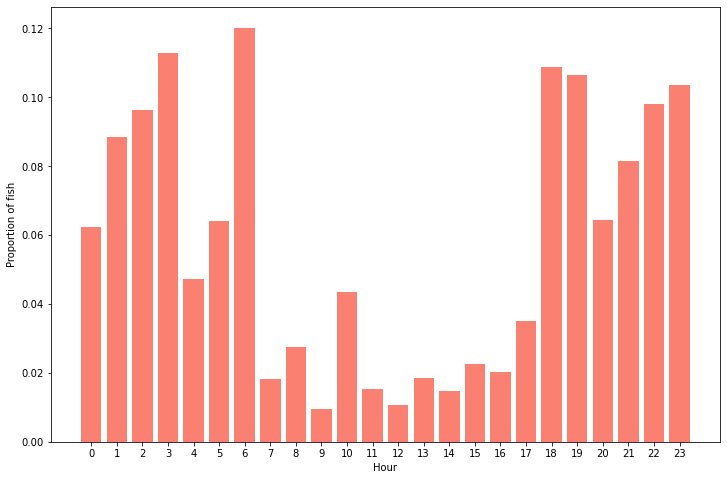

In [46]:
plot_by_hour("Chinook","0","Wild")

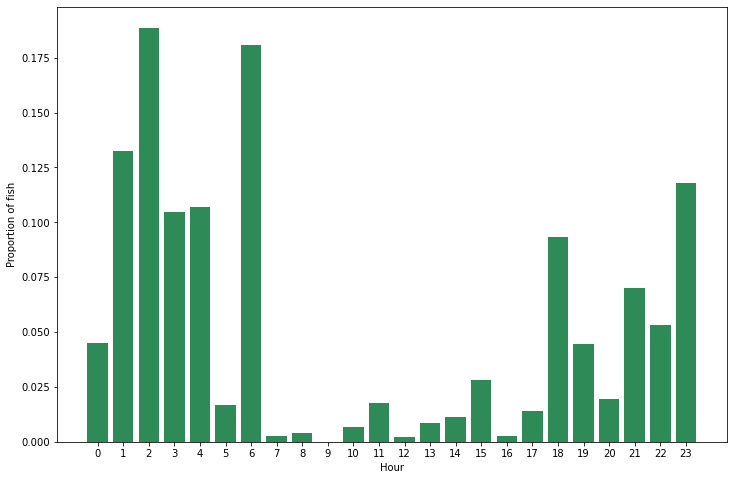

In [47]:
plot_by_hour("Chinook","0","Hat")

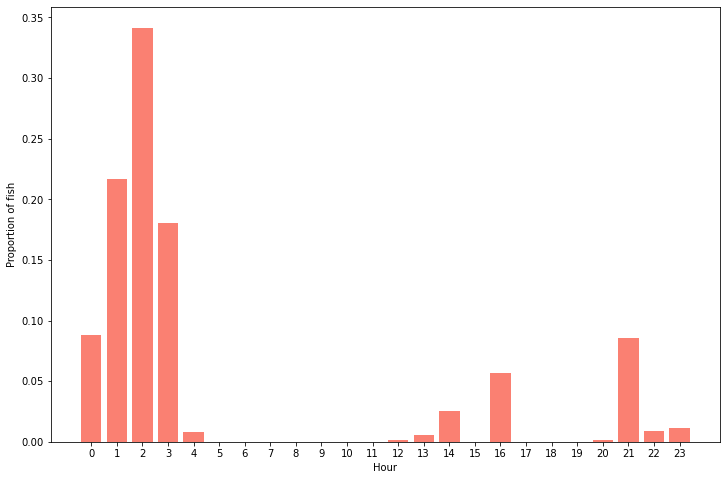

In [48]:
plot_by_hour("Chinook","1","Wild")

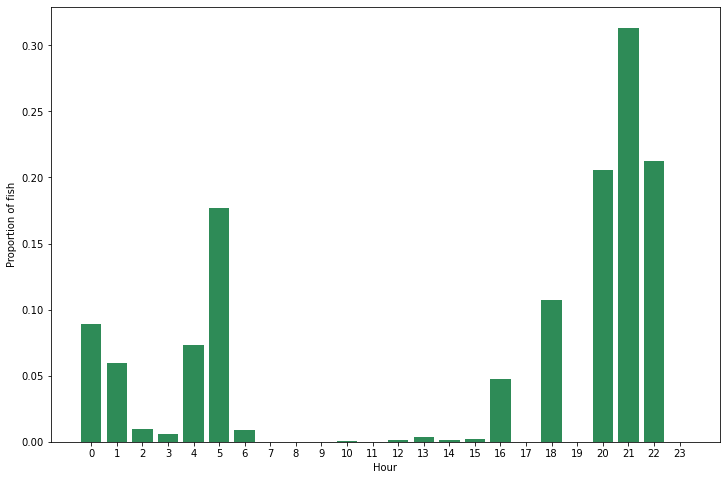

In [49]:
plot_by_hour("Chinook","1","Hat")

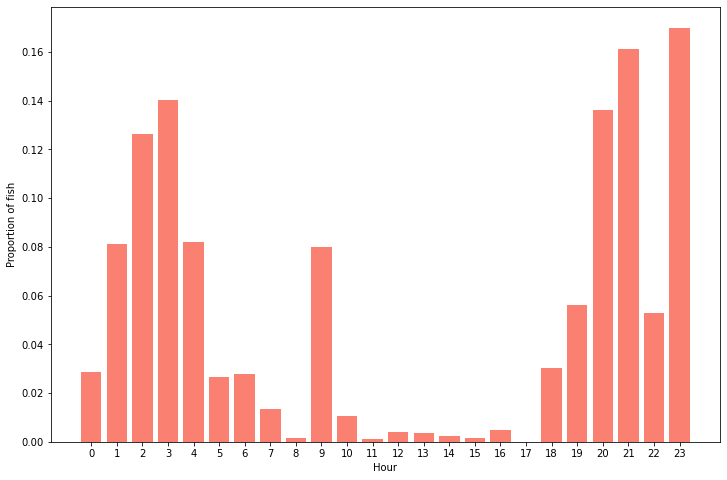

In [50]:
plot_by_hour("Coho","1","Wild")

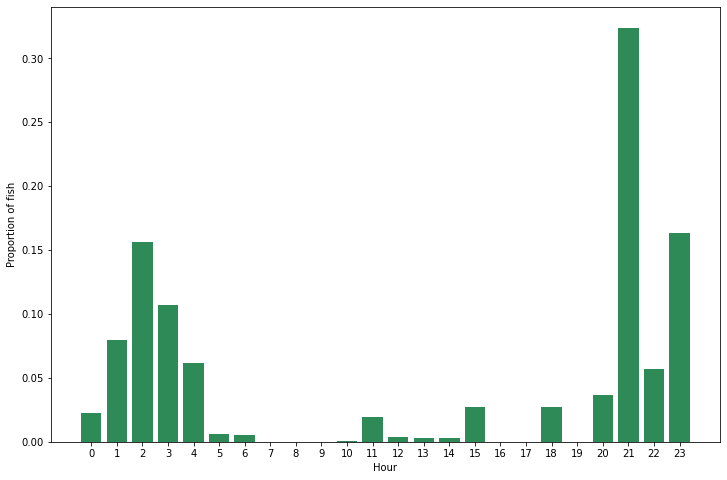

In [51]:
plot_by_hour("Coho","1","Hat")

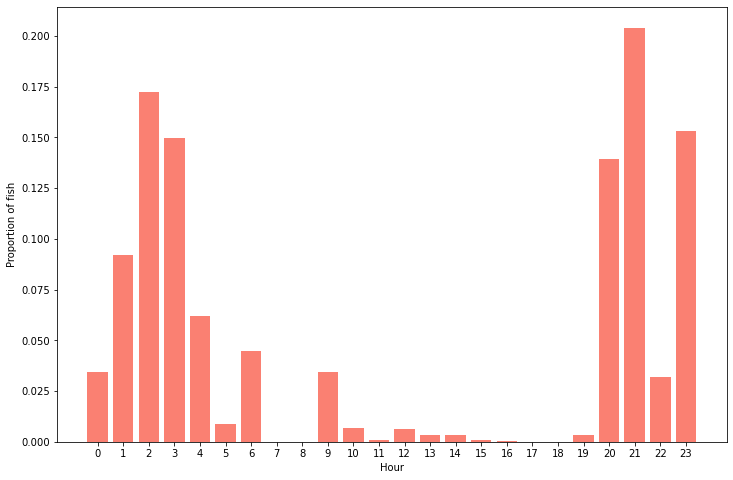

In [53]:
plot_by_hour("Steelhead","1","Wild")

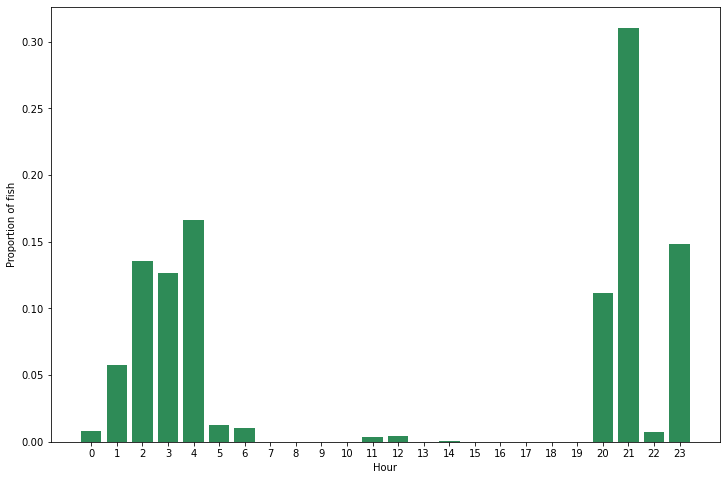

In [52]:
plot_by_hour("Steelhead","1","Hat")